# Convolution

Konvolusi adalah salah satu operasi aras lokal pada citra

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### Membuat fungsi konvolusi 2 dimensi

In [2]:
def konvolusi_2d(image, kernel):
    # Pada konsepnya kernel dibalik secara horizontal lalu vertikal
    kernel= np.flipud(np.fliplr(kernel))

    # Mendefinisikan panjang lebar gambar dan kernel
    xKernShape= kernel.shape[0]
    yKernShape= kernel.shape[1]

    xImgShape= image.shape[0]
    yImgShape= image.shape[1]

    # Lalu kita membentuk image/matrix baru yang berukuran sesuai XImgShape dan YImgShape
    output= image.copy()

    # Sekarang, kita akan melakukan perulangan untuk mengoperasikan kernel pada pixel satu2
    for y in range(image.shape[1]-2):

        # Mengecek apakah sudah di ujung baris
        if (y > image.shape[1]):
            break

        # else:
        # Jika belum, maka akan dilakukan perulangan di setiap kolom pada baris y
        for x in range(image.shape[0]-2):

            # Mengecek apakah sudah di ujung kolom
            if (x > image.shape[0]):
                break

            # Di sini dilakukan operai konvolusi
            # Menerapkan kernel, menjumlahkan elemen, lalu disimpan di piksel sesuai pada variabel output
            try:
                output[x+1, y+1]= int((kernel * image[x: (x + xKernShape), y: (y + yKernShape)]).sum())
                # output[x+1, y] = int(250)

                # Dilakukan clipping jika terdapat nilai piksel yang melewati batas warna 8 bit (0-255)
                if(output[x, y]<0):
                    output[x, y]= 0
                elif(output[x, y]>255):
                    output[x, y]= 255

            except:
                break

    # Me-return outputnya
    return output

### Membuat fungsi konvolusi

Kita memberi kondisi jika citra yang ingin dikonvolusi berwarna, maka akan dilakukan konvolusi 2 dimensi pada masing2 channel, lalu menyatukannya kembali

In [3]:
def konvolusi(image, kernel):
    input= image.copy()

    if(len(input.shape)==3):
        # Membagi gambar menjadi tiga channel, lalu mengaplikasikan fungsi konvolusi pada masing2 bagian
        [r, g, b]= [ konvolusi(i, kernel) for i in cv.split(input)]
        
        # Menyatukan kembali 3 bagian yang sudah dikonvolusi pada variabel output
        output= cv.merge([r, g, b]).astype(np.uint8)
    else:
        output= konvolusi_2d(input, kernel)
    return output

### Mengimpor gambar lalu menampilkannya

Text(0.5, 1.0, 'colored image')

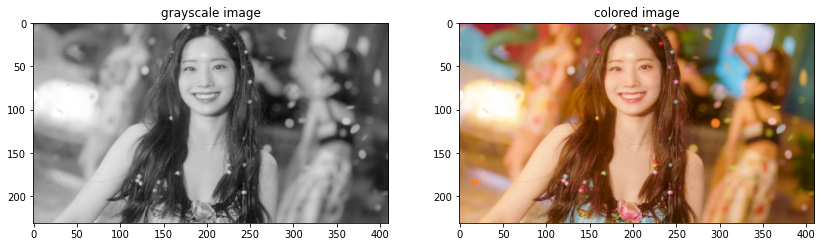

In [4]:
# Citra grayscale
img= cv.cvtColor(cv.imread('img\\dahyun_small.png'), cv.COLOR_BGR2GRAY)

# Citra berwarna
img2= cv.cvtColor(cv.imread('img\\dahyun_small.png'), cv.COLOR_BGR2RGB)

# Plot
fig, (gray, color)= plt.subplots(ncols=2, figsize=(14,6))

gray.imshow(img, cmap='gray')
gray.set_title('grayscale image')

color.imshow(img2)
color.set_title('colored image')

### Mendefinisikan kernel yang akan dipakai

Terdapat beberapa opsi kernel

In [5]:
# Mendefinisikan kernel
kernel_dict= {
    'outline': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'blur': np.array([[1/9, 1/9, 1/9], [1/9, 1/9,1/9], [1/9,1/9,1/9]]),
    'sharpen' : np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
             }

# kernel
kernel= kernel_dict['blur']

kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

### Mengaplikasikan konvolusi pada citra grayscale dan citra berwarna

In [6]:
# --- Konvolusi untuk citra grayscale ---

convolved_img= konvolusi(img, kernel)

# Konvolusi n kali --> untuk kasus di mana gambar beresolusi tinggi, diperlukan konvolusi beberapa kali
# Untuk mendapatkan hasil yang diinginkan
conv_count= 5
more_convolved_img= convolved_img.copy()
for i in range(conv_count-1):
    more_convolved_img= konvolusi(more_convolved_img, kernel)

# --- Konvolusi untuk citra berwarna ---

convolved_img2= konvolusi(img2, kernel)

more_convolved_img2= convolved_img2.copy()
for i in range(conv_count-1):
    more_convolved_img2= konvolusi(more_convolved_img2, kernel)


### Menampilkan hasil konvolusi

Akan dibandingkan gambar awal, gambar satu kali konvolusi, dan n kali konvolusi

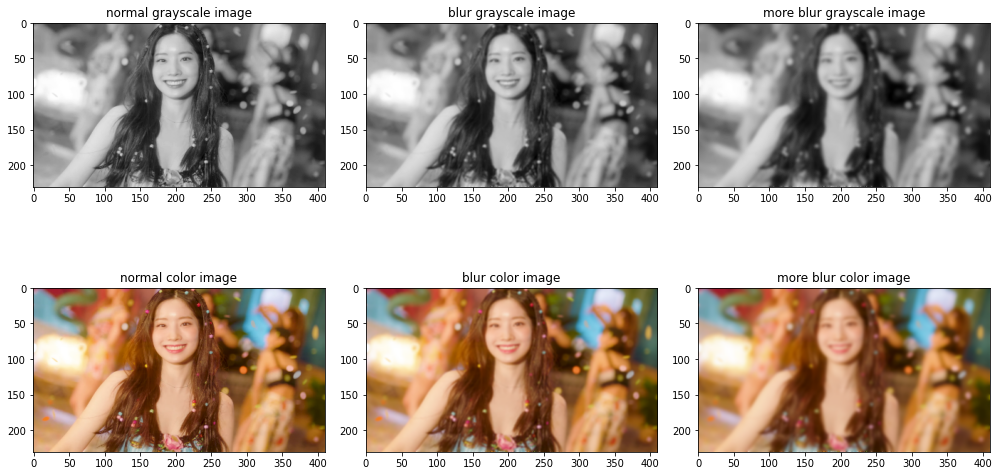

In [7]:
fig, ax= plt.subplots(ncols=3, nrows=2, figsize=(14,8))

# Membuat string untuk key dari kernel (yang nantinya akan ditampilkan di plot title)
kernel_key = [k for k, v in kernel_dict.items() if (np.all(kernel==v))][0]

ax[0][0].imshow(img, cmap='gray')
ax[0][0].set_title(f'normal grayscale image')

ax[0][1].imshow(convolved_img, cmap='gray')
ax[0][1].set_title(f'{kernel_key} grayscale image')

ax[0][2].imshow(more_convolved_img, cmap='gray')
ax[0][2].set_title(f'more {kernel_key} grayscale image')

ax[1][0].imshow(img2, cmap='gray')
ax[1][0].set_title(f'normal color image')

ax[1][1].imshow(convolved_img2, cmap='gray')
ax[1][1].set_title(f'{kernel_key} color image')

ax[1][2].imshow(more_convolved_img2, cmap='gray')
ax[1][2].set_title(f'more {kernel_key} color image')

plt.tight_layout()
plt.show()